<a href="https://colab.research.google.com/github/rishabh224225/LGMVIP-DataScience-TASK2/blob/main/LGMDSTASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


LGM Internship - Lets Grow More

Author: Rishabh Tiwari

BEGINNER LEVEL TASK

Task2 - VIP Data Science Task

Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10 ## for setting_size of the fig

from sklearn.preprocessing import MinMaxScaler  ## for nomalising
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
df.tail()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
df.count()


Date                    2035
Open                    2035
High                    2035
Low                     2035
Last                    2035
Close                   2035
Total Trade Quantity    2035
Turnover (Lacs)         2035
dtype: int64

In [14]:
df.value_counts()


Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2018-09-28  234.05  235.95  230.20  233.50  233.75  3069914               7162.35            1
2013-04-10  130.85  131.80  128.50  130.90  131.00  1396238               1817.54            1
2013-03-20  129.10  130.40  127.00  128.55  128.35  2640664               3399.29            1
2013-03-21  128.55  128.60  123.45  123.80  124.60  2807473               3541.91            1
2013-03-22  125.00  127.50  122.60  126.30  125.90  1442967               1806.03            1
                                                                                            ..
2016-01-11  143.20  144.00  140.95  141.60  141.90  1201860               1714.30            1
2016-01-12  142.40  143.45  138.05  139.90  139.50  1353097               1896.92            1
2016-01-13  141.75  141.95  130.30  135.40  135.60  1907971               2586.28            1
2016-01-14  132.10  136.25  131.15  133.90  134.05  143

In [15]:
df.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [16]:
from pandas.plotting import scatter_matrix


In [17]:
col =['Open','High', 'Low', 'Last','Total Trade Quantity', 'Turnover (Lacs)']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb05a42b710>,
      dtype=object)

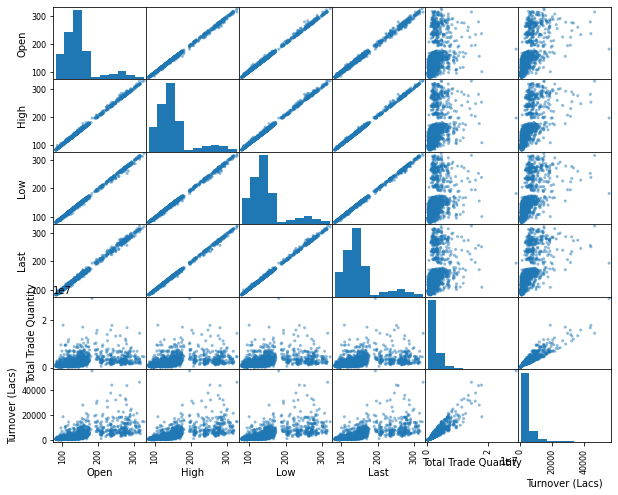

In [18]:
scatter_matrix(df[col],figsize=(10,8))


in any stock market or in share exchange The profit or loss calculation is usually determined by the closing price of a stock for the day

In [19]:
#assuming index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

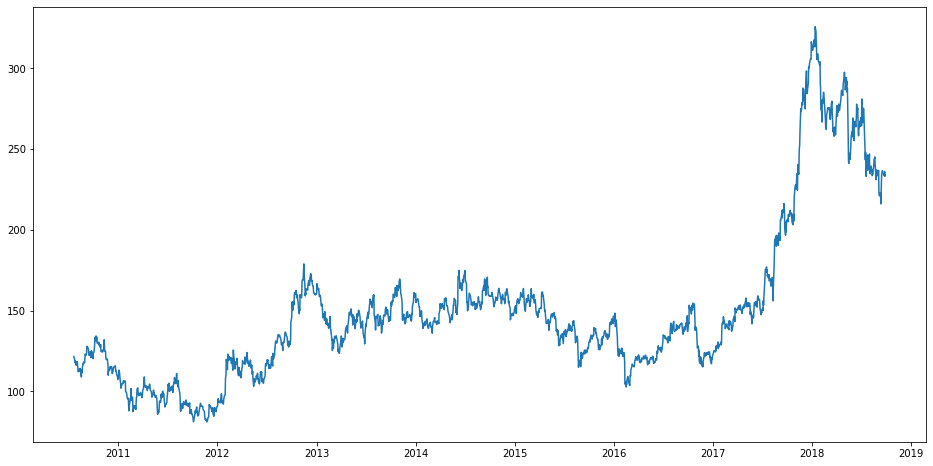

In [20]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [21]:
#create a dataframe with only the Date and Close price columns of the data.
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [22]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [32]:
#splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [25]:
new_data.shape, train.shape, valid.shape
((1235, 2), (987, 2), (248, 2))

((1235, 2), (987, 2), (248, 2))

# LSTM MODEL
LSTM is able to store past information that is important, and forget the information that is not

In [28]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [29]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [30]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)